In [1]:
import pandas as pd
import numpy as np

# Mean and CI of the average cycle time for varying arrival rates

low_utilization


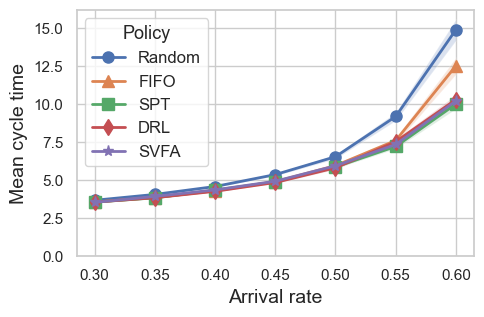

PPO: 	 Mean: 5.8 (0.1) 	 Best!
SVFA: 	 Mean: 5.9 (0.1) 	 Not significant
SPT: 	 Mean: 5.9 (0.09) 	 Not significant
FIFO: 	 Mean: 6.0 (0.11) 	 Not significant
random: 	 Mean: 6.5 (0.13) 	 Significant
ParkSong: 	 Mean: 6.0 (0.09) 	 Significant
DDQN: 	 Mean: 2383.5 (18.75) 	 Significant


high_utilization


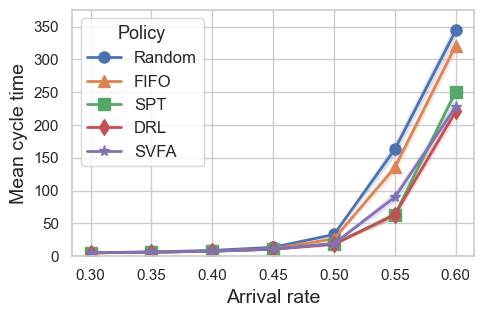

PPO: 	 Mean: 17.9 (0.72) 	 Best!
SVFA: 	 Mean: 19.4 (0.99) 	 Significant
SPT: 	 Mean: 19.4 (0.96) 	 Significant
FIFO: 	 Mean: 26.5 (1.86) 	 Significant
random: 	 Mean: 33.2 (3.07) 	 Significant
ParkSong: 	 Mean: 19.4 (1.01) 	 Significant
DDQN: 	 Mean: 2501.2 (4.83) 	 Significant


slow_server


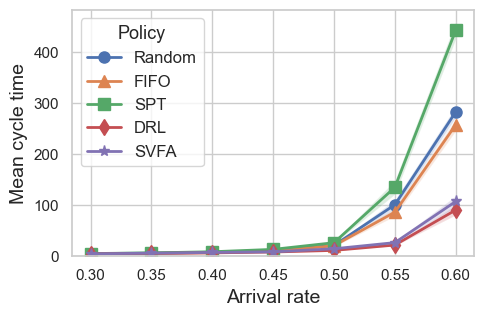

PPO: 	 Mean: 11.5 (0.33) 	 Best!
SVFA: 	 Mean: 14.7 (0.45) 	 Significant
SPT: 	 Mean: 26.6 (1.88) 	 Significant
FIFO: 	 Mean: 20.8 (1.86) 	 Significant
random: 	 Mean: 21.2 (1.25) 	 Significant
ParkSong: 	 Mean: 20.5 (1.26) 	 Significant
DDQN: 	 Mean: 58.9 (5.6) 	 Significant


down_stream


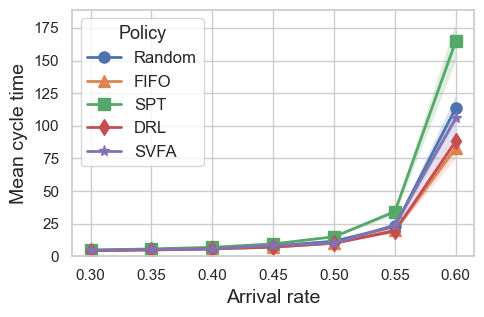

PPO: 	 Mean: 10.0 (0.35) 	 Not significant
SVFA: 	 Mean: 10.0 (0.32) 	 Not significant
SPT: 	 Mean: 14.9 (0.61) 	 Significant
FIFO: 	 Mean: 9.9 (0.32) 	 Best!
random: 	 Mean: 11.5 (0.39) 	 Significant
ParkSong: 	 Mean: 14.7 (0.59) 	 Significant
DDQN: 	 Mean: 2499.9 (6.51) 	 Significant


n_system


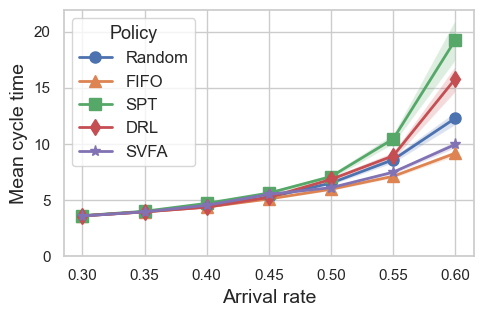

PPO: 	 Mean: 6.8 (0.2) 	 Significant
SVFA: 	 Mean: 6.1 (0.11) 	 Not significant
SPT: 	 Mean: 7.1 (0.21) 	 Significant
FIFO: 	 Mean: 6.0 (0.12) 	 Best!
random: 	 Mean: 6.5 (0.15) 	 Significant
ParkSong: 	 Mean: 6.3 (0.14) 	 Significant
DDQN: 	 Mean: 6.7 (0.11) 	 Significant


parallel


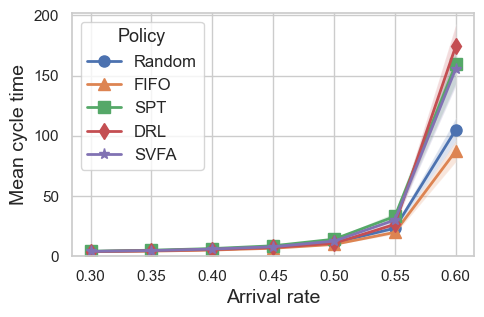

PPO: 	 Mean: 10.8 (0.37) 	 Significant
SVFA: 	 Mean: 12.6 (0.54) 	 Significant
SPT: 	 Mean: 14.1 (0.6) 	 Significant
FIFO: 	 Mean: 9.8 (0.35) 	 Best!
random: 	 Mean: 11.1 (0.49) 	 Significant
ParkSong: 	 Mean: 13.7 (0.6) 	 Significant
DDQN: 	 Mean: 2495.9 (5.45) 	 Significant


complete


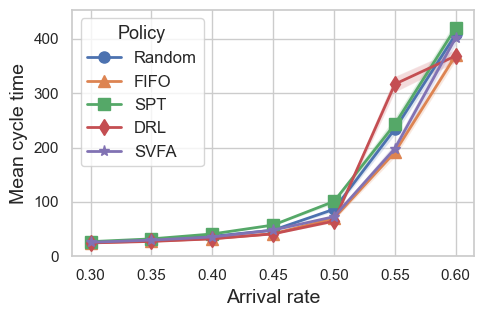

PPO: 	 Mean: 64.7 (2.63) 	 Best!
SVFA: 	 Mean: 72.9 (2.36) 	 Significant
SPT: 	 Mean: 100.9 (4.07) 	 Significant
FIFO: 	 Mean: 69.7 (3.5) 	 Significant
random: 	 Mean: 86.5 (4.12) 	 Significant
ParkSong: 	 Mean: 10048.5 (5.66) 	 Significant
DDQN: 	 Mean: 2502.6 (6.25) 	 Significant


complete_reversed


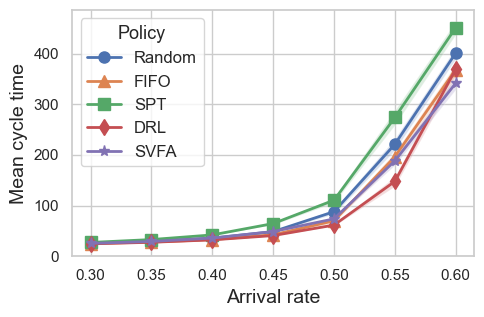

PPO: 	 Mean: 61.5 (1.5) 	 Best!
SVFA: 	 Mean: 73.8 (2.48) 	 Significant
SPT: 	 Mean: 110.7 (4.77) 	 Significant
FIFO: 	 Mean: 70.0 (3.7) 	 Significant
random: 	 Mean: 88.0 (4.53) 	 Significant
ParkSong: 	 Mean: 10048.5 (5.66) 	 Significant
DDQN: 	 Mean: 2498.4 (6.16) 	 Significant


complete_parallel


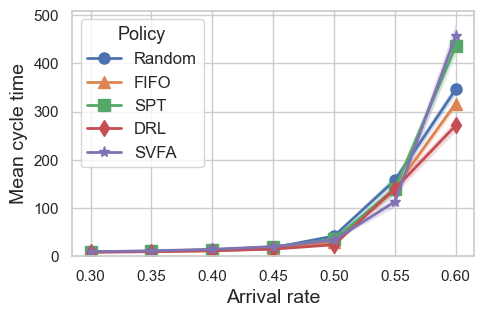

PPO: 	 Mean: 23.8 (0.99) 	 Best!
SVFA: 	 Mean: 33.4 (1.52) 	 Significant
SPT: 	 Mean: 35.2 (1.71) 	 Significant
FIFO: 	 Mean: 29.3 (1.73) 	 Significant
random: 	 Mean: 41.9 (3.99) 	 Significant
ParkSong: 	 Mean: 10048.5 (5.66) 	 Significant
DDQN: 	 Mean: 2504.8 (5.29) 	 Significant




In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import pickle as pkl

def get_best_policy(cycle_times_dict):
    best_policy = None
    lowest_avg_cycle_time = float('inf')
    
    for policy, cycle_times in cycle_times_dict.items():
        avg_cycle_time = np.mean(cycle_times)
        if avg_cycle_time < lowest_avg_cycle_time:
            lowest_avg_cycle_time = avg_cycle_time
            best_policy = policy
    
    return best_policy

sns.set(style="whitegrid")

dfs_svfa = pkl.load(open('./results_revision/results_SVFA/dfs_simple.pkl', 'rb'))
dfs_svfa_comp = pkl.load(open('./results_revision/results_SVFA/dfs.pkl', 'rb'))

for config in ['low_utilization', 'high_utilization', 'slow_server', 'down_stream', 'n_system', 'parallel', 'complete', 'complete_reversed', 'complete_parallel']:
    fig, ax = plt.subplots(figsize=(5, 3.33))  
    arrival_rates = [0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]
    means = []
    conf_intervals = []
    policies = []
    df_data = {}

    heuristic_policy_names = {'random': 'random', 'FIFO': 'FIFO', 'SPT': 'ShortestProcessingTime', 'PPO': 'PPO', 'SVFA': 'SVFA','DDQN': 'DDQN', 'ParkSong': 'ParkSong'}
    label_policy_names = {'random': 'Random', 'FIFO': 'FIFO', 'SPT': 'SPT', 'PPO': 'DRL', 'SVFA': 'SVFA','DDQN': 'DDQN', 'ParkSong': 'ParkSong'}

    for arrival_rate in arrival_rates:
        for policy in ['random', 'FIFO', 'SPT', 'PPO', 'SVFA', 'DDQN', 'ParkSong']:
            if policy == 'SVFA': 
                if 'complete' not in config:
                    data = dfs_svfa[(arrival_rate, config)]['CT_mean']
                else:
                    data = dfs_svfa_comp[(arrival_rate, config)]['CT_mean']                
            elif policy == 'DDQN':
                data = pd.read_csv(f'results/{policy}_{config}.txt')['mean_cycle_time']
            elif policy == 'ParkSong':
                if 'complete' in config:
                    data = [9999+i for i in range(100)]
                else:
                    data = pd.read_csv(f'results/{policy}_{config}.txt')['mean_cycle_time']
            else: 
                data = pd.read_csv(f'results_revision/results_{policy}/{heuristic_policy_names[policy]}_{config}_{str(arrival_rate)}.txt')['mean_cycle_time']

            if arrival_rate == 0.5:
                df_data[policy] = data
            mean = np.mean(data)
            conf_interval = 1.96 * (np.std(data) / np.sqrt(len(data)))
            means.append(mean)
            conf_intervals.append(conf_interval)
            policies.append(policy)

    df = pd.DataFrame({
        'Arrival Rate': np.repeat(arrival_rates, len(heuristic_policy_names)),
        'Mean': means,
        'Confidence Interval': conf_intervals,
        'Policy': policies
    })

    df_numeric = df[df['Arrival Rate'] != 'pattern']

    markers = {'random': 'o', 'FIFO': '^', 'SPT': 's', 'PPO': 'd', 'SVFA': '*'}

    for policy in df_numeric['Policy'].unique():
        if policy not in ['DDQN', 'ParkSong']:
            policy_data = df_numeric[df_numeric['Policy'] == policy]
            ax.plot(policy_data['Arrival Rate'], policy_data['Mean'], label=label_policy_names[policy], marker=markers[policy], markersize=8, linewidth=2)
            ax.fill_between(policy_data['Arrival Rate'], policy_data['Mean'] - policy_data['Confidence Interval'], policy_data['Mean'] + policy_data['Confidence Interval'], alpha=0.2)

    # Set titles, labels, and legends
    #ax.set_title(f'Varying arrival rates: {config}', fontsize=16)
    ax.set_xlabel('Arrival rate', fontsize=14)
    ax.set_ylabel('Mean cycle time', fontsize=14)
    ax.set_ylim(bottom=0)
    ax.legend(title='Policy', title_fontsize='13', fontsize='12')
    print(config)
    plt.tight_layout()
    if arrival_rates[-1] == 0.5:
        plt.savefig(f'./figures/varying_arrival_rates/varying_arrival_rates_{config}_0_5.pdf')
    else:
        plt.savefig(f'./figures/varying_arrival_rates/varying_arrival_rates_{config}_full.pdf')
    plt.show()

    if not len(df_data) == 0:
        best_policy = get_best_policy(df_data)
        for policy in ['PPO', 'SVFA', 'SPT', 'FIFO', 'random', 'ParkSong', 'DDQN']:
            if policy != best_policy:
                p_value = stats.ttest_ind(df_data[best_policy], df_data[policy])[1]
                if p_value < 0.05:
                    print(f'{policy}: \t Mean: {np.round(np.mean(df_data[policy]), 1)} ({np.round(1.96 * (np.std(df_data[policy]) / np.sqrt(len(df_data[policy]))), 2)}) \t Significant')
                else:
                    print(f'{policy}: \t Mean: {np.round(np.mean(df_data[policy]), 1)} ({np.round(1.96 * (np.std(df_data[policy]) / np.sqrt(len(df_data[policy]))), 2)}) \t Not significant')
            else:
                print(f'{policy}: \t Mean: {np.round(np.mean(df_data[best_policy]), 1)} ({np.round(1.96 * (np.std(df_data[best_policy]) / np.sqrt(len(df_data[best_policy]))), 2)}) \t Best!')
    else:
        print(f"No data available for configuration: {config}")
    print('\n')

   

# Mean and CI of the uncompleted cases for varying arrival rates

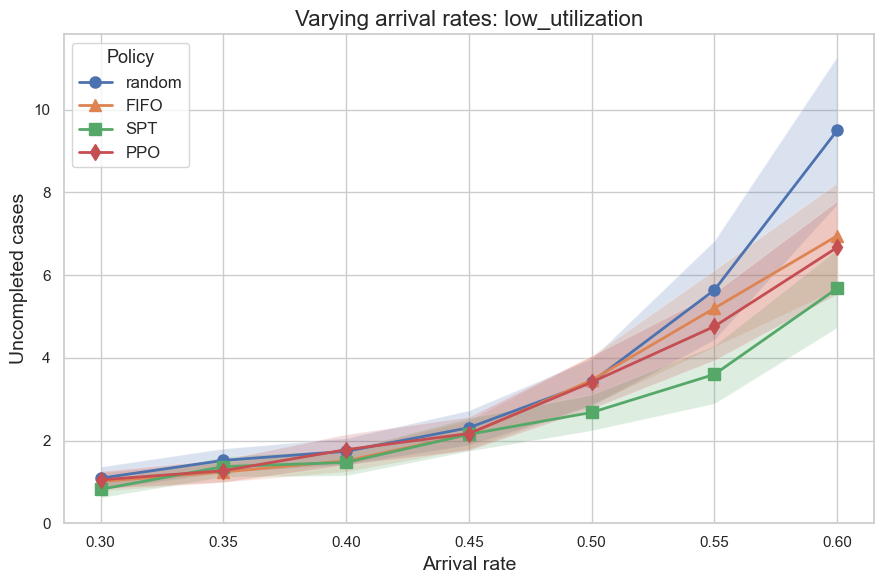

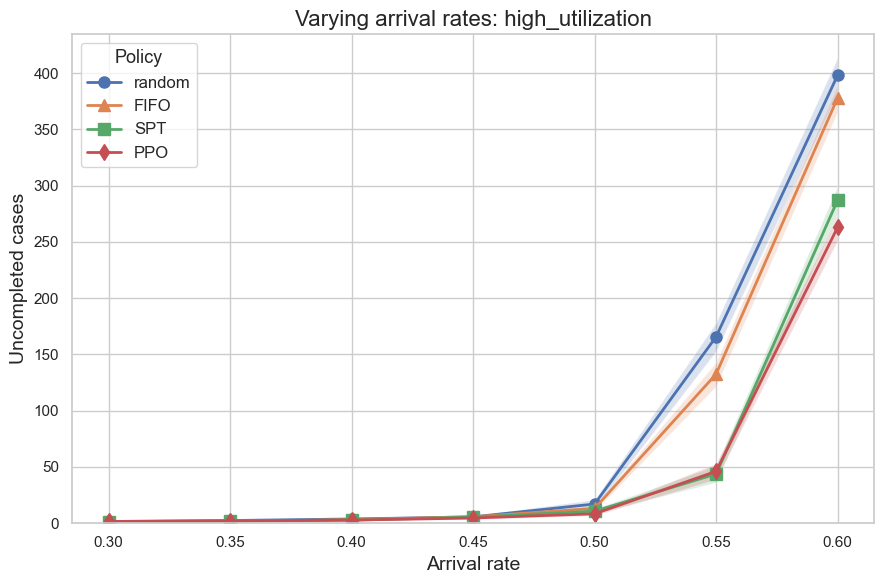

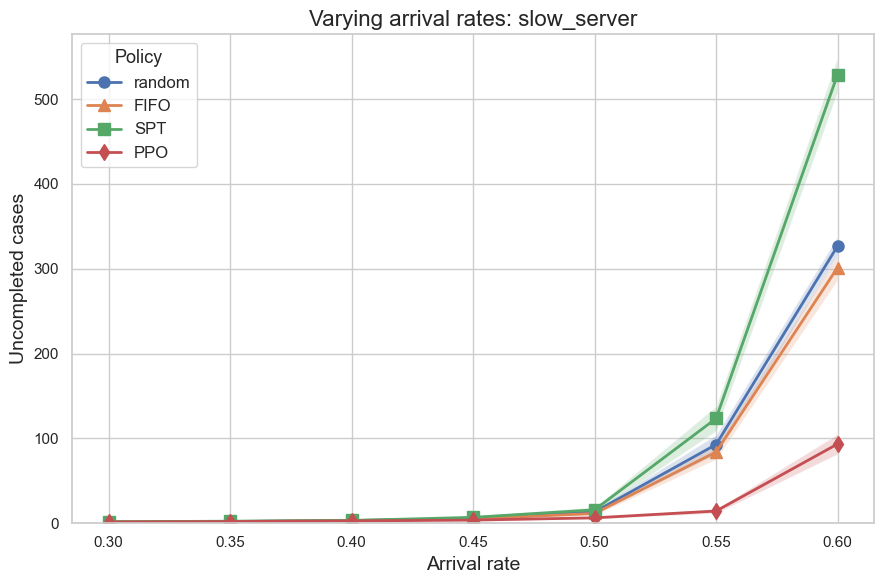

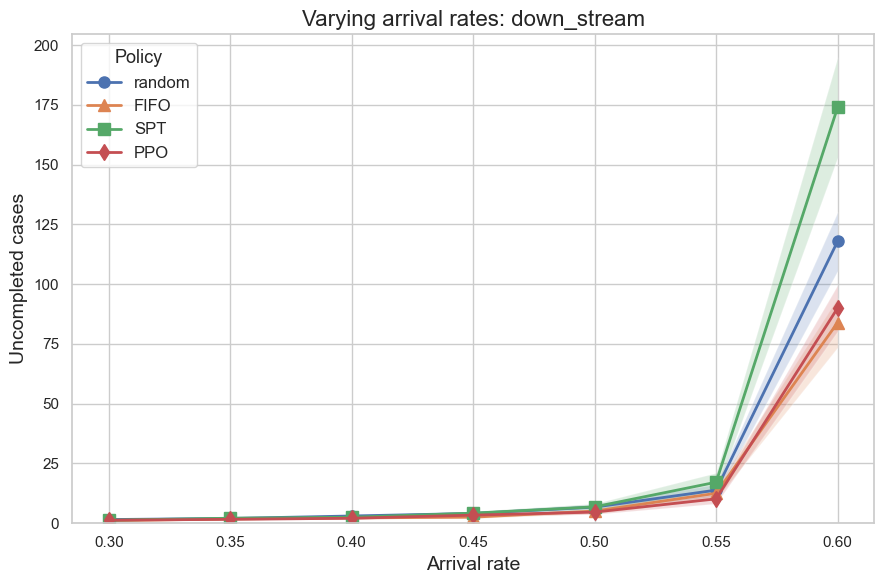

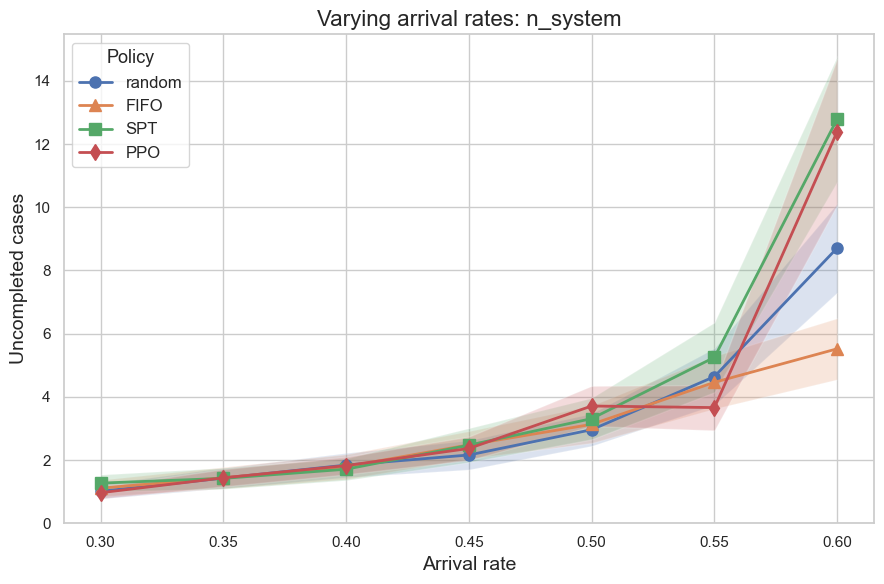

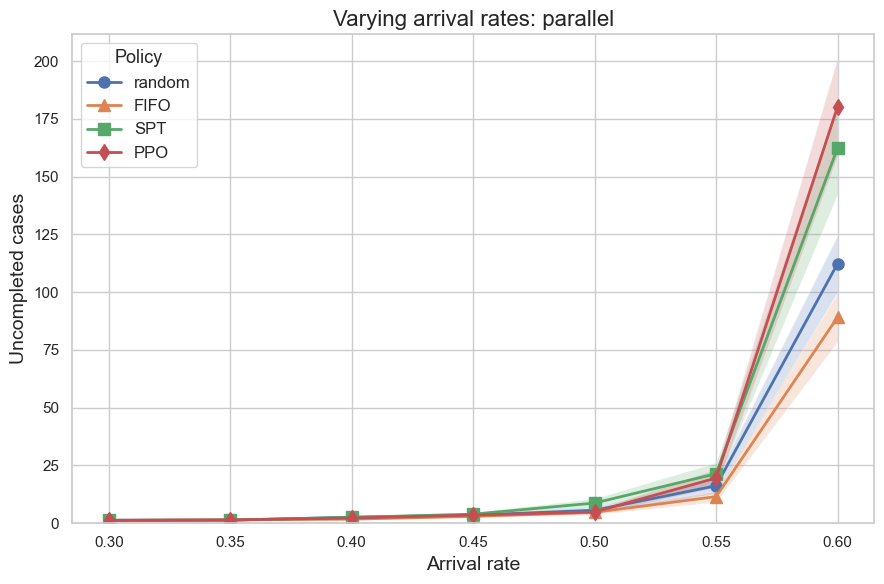

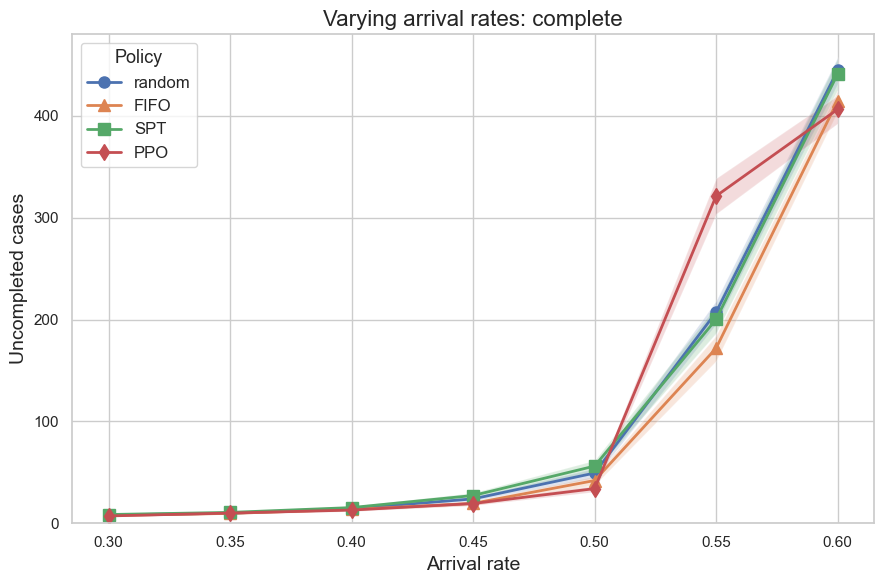

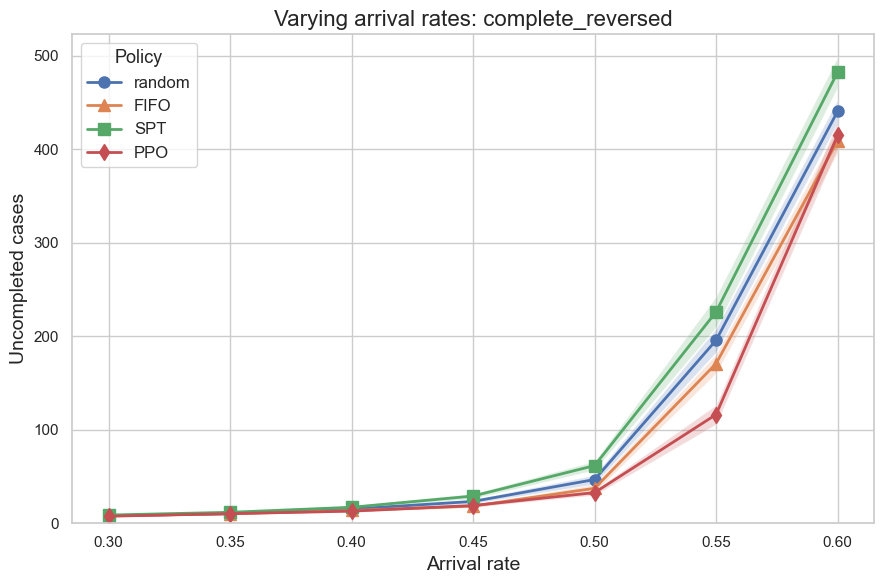

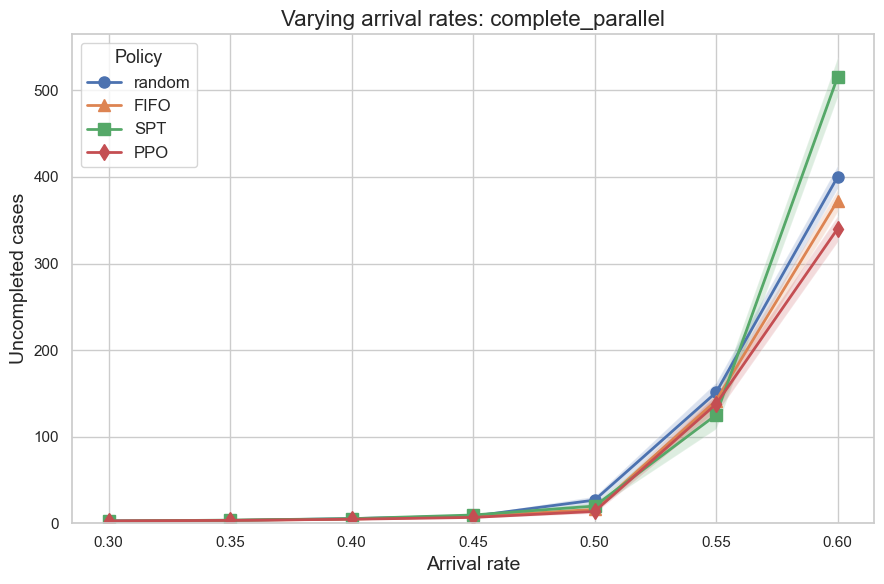

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(style="whitegrid")

for config in ['low_utilization', 'high_utilization', 'slow_server', 'down_stream', 'n_system', 'parallel', 'complete', 'complete_reversed', 'complete_parallel']:
    fig, ax = plt.subplots(figsize=(9, 6))    
    arrival_rates = [0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6]
    means = []
    conf_intervals = []
    policies = []

    heuristic_policy_names = {'random': 'Random', 'FIFO': 'FIFO', 'SPT': 'ShortestProcessingTime', 'PPO':'PPO'}

    for arrival_rate in arrival_rates:
        for policy in ['random', 'FIFO', 'SPT', 'PPO']:
            data = pd.read_csv(f'results_revision/results_{policy}/{heuristic_policy_names[policy]}_{config}_{str(arrival_rate)}.txt')['uncompleted_cases']
            mean = np.mean(data)
            conf_interval = 1.96 * (np.std(data) / np.sqrt(len(data)))
            means.append(mean)
            conf_intervals.append(conf_interval)
            policies.append(policy)

    df = pd.DataFrame({
        'Arrival Rate': np.repeat(arrival_rates, len(heuristic_policy_names)),
        'Mean': means,
        'Confidence Interval': conf_intervals,
        'Policy': policies
    })

    df_numeric = df[df['Arrival Rate'] != 'pattern']

    markers = {'random': 'o', 'FIFO': '^', 'SPT': 's', 'PPO':'d'}

    for policy in df_numeric['Policy'].unique():
        policy_data = df_numeric[df_numeric['Policy'] == policy]
        ax.plot(policy_data['Arrival Rate'], policy_data['Mean'], label=policy, marker=markers[policy], markersize=8, linewidth=2)
        ax.fill_between(policy_data['Arrival Rate'], policy_data['Mean'] - policy_data['Confidence Interval'], policy_data['Mean'] + policy_data['Confidence Interval'], alpha=0.2)

    # Set titles, labels, and legends
    ax.set_title(f'Varying arrival rates: {config}', fontsize=16)
    ax.set_xlabel('Arrival rate', fontsize=14)
    ax.set_ylabel('Uncompleted cases', fontsize=14)
    ax.set_ylim(bottom=0)
    ax.legend(title='Policy', title_fontsize='13', fontsize='12')

    plt.tight_layout()
    #print(df)
    plt.show()

# Arrival patterns

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import os

for config in ['low_utilization', 'high_utilization', 'slow_server', 'down_stream', 'n_system', 'parallel', 'complete', 'complete_reversed', 'complete_parallel']:
    means = []
    conf_intervals = []
    policies = []
    df_data = {}

    heuristic_policy_names = {'PPO':'PPO', 'PPO_t':'PPO_t', 'SVFA':'SVFA', 'SPT': 'ShortestProcessingTime', 'FIFO': 'FIFO','random': 'Random' }

    for policy in ['random', 'FIFO', 'SPT', 'PPO', 'PPO_t', 'SVFA']:
        if policy == 'SVFA': 
            if 'complete' not in config:
                data = dfs_svfa[(arrival_rate, config)]['CT_mean']
            else:
                data = dfs_svfa_comp[(arrival_rate, config)]['CT_mean']                
        elif policy == 'DDQN':
            data = pd.read_csv(f'results/{policy}_{config}.txt')['mean_cycle_time']
        elif policy == 'ParkSong':
            if 'complete' in config:
                data = [9999+i for i in range(100)]
            else:
                data = pd.read_csv(f'results/{policy}_{config}.txt')['mean_cycle_time']
        else: 
            data = pd.read_csv(f'results_revision/results_{policy}/{heuristic_policy_names[policy]}_{config}_{str(arrival_rate)}.txt')['mean_cycle_time']


        df_data[policy] = data
        mean = np.mean(data)
        conf_interval = 1.96 * (np.std(data) / np.sqrt(len(data)))
        means.append(mean)
        conf_intervals.append(conf_interval)
        policies.append(policy)

    df = pd.DataFrame({
        'Mean': means,
        'Confidence Interval': conf_intervals,
        'Policy': policies
    })

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Policy', y='Mean', data=df, capsize=.2)
    for i in range(len(df)):
        plt.errorbar(i, df['Mean'][i], yerr=df['Confidence Interval'][i], fmt='none', c='black', capsize=5)
    plt.title(f'{config}: Mean Cycle Time by Policy with Confidence Intervals')
    plt.xlabel('Policy')
    plt.ylabel('Mean Cycle Time')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    if not len(df_data) == 0:
        best_policy = get_best_policy(df_data)
        for policy in ['PPO', 'PPO_t', 'SVFA', 'SPT', 'FIFO', 'random']:
            if policy != best_policy:
                p_value = stats.ttest_ind(df_data[best_policy], df_data[policy])[1]
                if p_value < 0.05:
                    print(f'{policy}: \t Mean: {np.round(np.mean(df_data[policy]), 1)} ({np.round(1.96 * (np.std(df_data[policy]) / np.sqrt(len(df_data[policy]))), 2)}) \t Significant')
                else:
                    print(f'{policy}: \t Mean: {np.round(np.mean(df_data[policy]), 1)} ({np.round(1.96 * (np.std(df_data[policy]) / np.sqrt(len(df_data[policy]))), 2)}) \t Not significant')
            else:
                print(f'{policy}: \t Mean: {np.round(np.mean(df_data[best_policy]), 1)} ({np.round(1.96 * (np.std(df_data[best_policy]) / np.sqrt(len(df_data[best_policy]))), 2)}) \t Best!')
    else:
        print(f"No data available for configuration: {config}")
    print('\n')

FileNotFoundError: [Errno 2] No such file or directory: 'results_revision/results_PPO_t/PPO_t_low_utilization_0.6.txt'